In [2]:
import OpenDartReader

api_key = '7f942045d438f45c28bc2707063b8838be98f7e6'

dart = OpenDartReader(api_key)

In [3]:
daishin = dart.report('대신증권', '최대주주', 2022)
daishin.head()

,rcept_no,corp_cls,corp_code,corp_name,stock_knd,nm,relate,bsis_posesn_stock_co,bsis_posesn_stock_qota_rt,trmend_posesn_stock_co,trmend_posesn_stock_qota_rt,rm
0,20230316001545,Y,00110893,대신증권,보통주,양홍석,본인,"4,985,667",9.82,"5,175,034",10.19,*시장매입\n*자사주성과급
1,20230316001545,Y,00110893,대신증권,우선주,양회금,특수관계인,"2,245",0.01,"2,245",0.01,-
2,20230316001545,Y,00110893,대신증권,보통주,노정남,특수관계인,"40,737",0.08,"40,737",0.08,-
3,20230316001545,Y,00110893,대신증권,우선주,노정남,특수관계인,"1,733",0.00,"1,733",0.00,-
4,20230316001545,Y,00110893,대신증권,보통주,안경환,특수관계인,"3,500",0.01,0,0.00,*시장매도


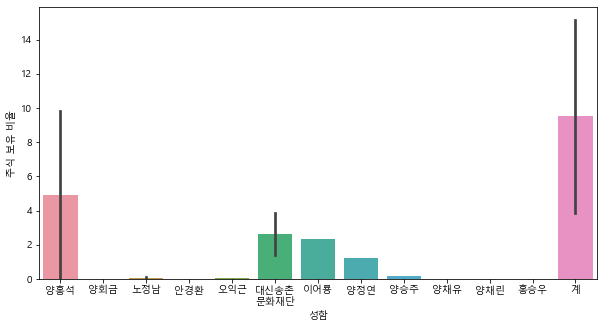

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

daishin['bsis_posesn_stock_qota_rt'] = daishin['bsis_posesn_stock_qota_rt'].astype(float)

plt.rcParams['font.family'] = 'Malgun Gothic'

plt.figure(figsize=(10, 5))
ax = sns.barplot(x='nm', y='bsis_posesn_stock_qota_rt', data=daishin)
ax.set_xlabel('성함')
ax.set_ylabel('주식 보유 비율')
plt.show()

Graph with 16 nodes and 13 edges


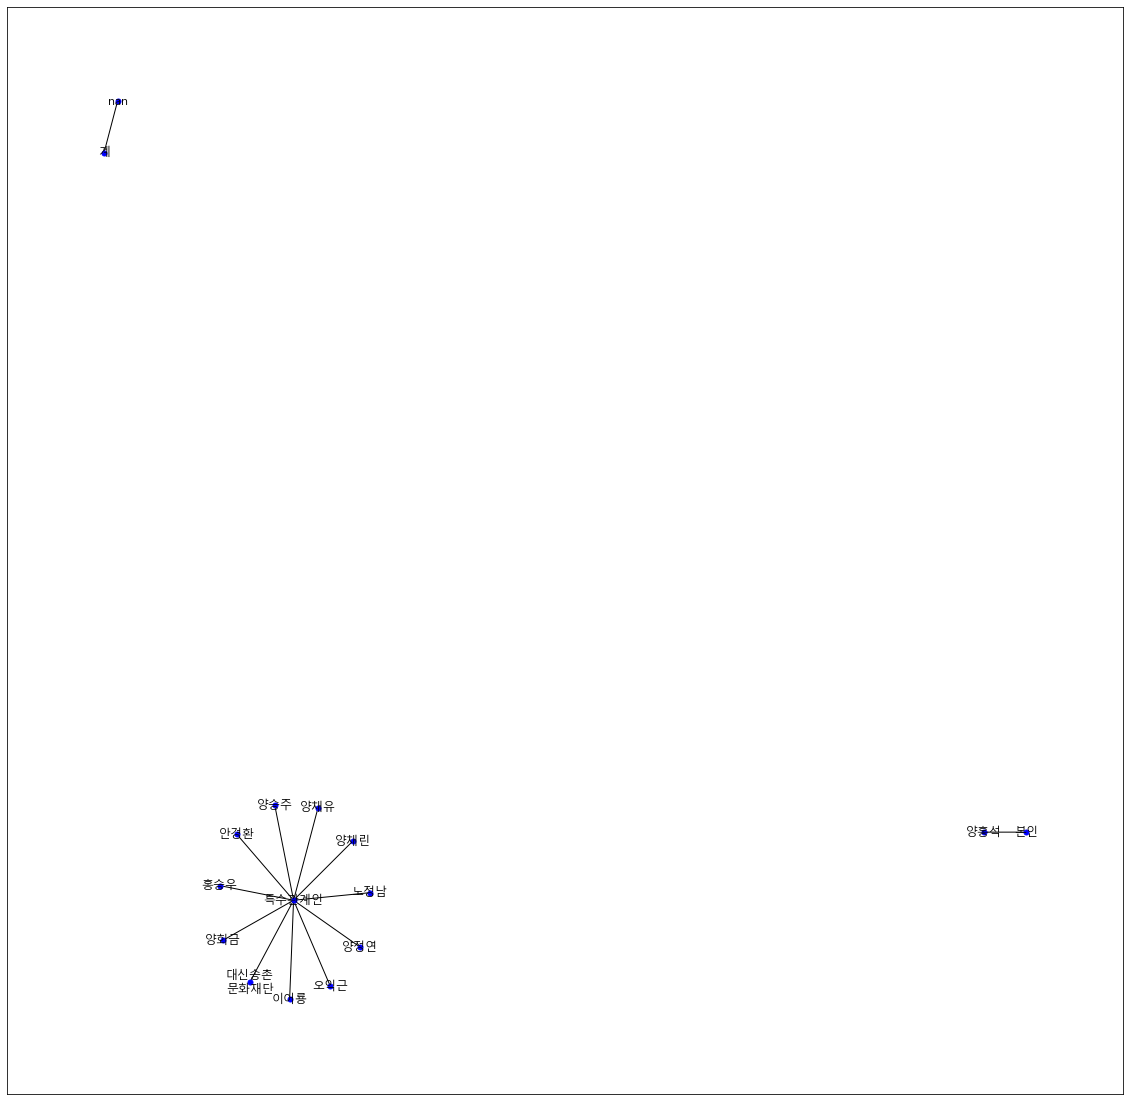

In [5]:
import matplotlib.font_manager as fm
import networkx as nx
# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

g = nx.Graph()
g = nx.from_pandas_edgelist(daishin, source = 'nm', target = 'relate')
print(nx.info(g))

plt.figure(figsize=(20, 20))
pos = nx.spring_layout(g, k = 0.15)
nx.draw_networkx(g,pos, node_size = 25, node_color = 'blue', font_family='Malgun Gothic')
plt.show()

In [6]:
daishin_im = dart.report('대신증권', '임원', 2022)
daishin_im.head()

,rcept_no,corp_cls,corp_code,corp_name,nm,sexdstn,birth_ym,ofcps,rgist_exctv_at,fte_at,chrg_job,main_career,mxmm_shrholdr_relate,hffc_pd,tenure_end_on
0,20230316001545,Y,00110893,대신증권,이어룡,여,1953년 09월,회장,사내이사,상근,-,상명여자사범대,1항 1호 나,2004.09.24~2022.12.31,2023년 03월 31일
1,20230316001545,Y,00110893,대신증권,송혁,남,1964년 04월,부사장,미등기,상근,리테일총괄,전북대 회계학\n 대신증권 비서실장\n 대신증권 비서/브랜드본부장\n 대신증권 WM...,-,2010.04.01~2022.12.31,2024년 03월 31일
2,20230316001545,Y,00110893,대신증권,길기모,남,1968년 12월,전무,미등기,상근,리스크관리부문장,서울대 경제학\n 메리츠종금증권 심사팀장\n 메리츠종금증권 리스크관리본부장,-,2019.04.01~2022.12.31,2023년 03월 31일
3,20230316001545,Y,00110893,대신증권,박성준,남,1973년 02월,전무,미등기,상근,IB부문장,홍익대 경영학\n 대신증권 금융주치의전략부장\n 대신증권 IB솔루션부장\n 대신증권...,-,2018.01.01~2022.12.31,2024년 03월 31일
4,20230316001545,Y,00110893,대신증권,이정화,남,1968년 11월,전무,미등기,상근,-,부경대 무역학\n 대신증권 마산지점장\n 대신증권 부전동지점장\n 대신증권 동래지점장,-,2016.01.01~2022.12.31,2023년 03월 31일


In [7]:
name_split = daishin_im["main_career"].str.split("\n")
daishin_im["main_career"] = name_split.str.get(0)


In [8]:
daishin_im.head()

,rcept_no,corp_cls,corp_code,corp_name,nm,sexdstn,birth_ym,ofcps,rgist_exctv_at,fte_at,chrg_job,main_career,mxmm_shrholdr_relate,hffc_pd,tenure_end_on
0,20230316001545,Y,00110893,대신증권,이어룡,여,1953년 09월,회장,사내이사,상근,-,상명여자사범대,1항 1호 나,2004.09.24~2022.12.31,2023년 03월 31일
1,20230316001545,Y,00110893,대신증권,송혁,남,1964년 04월,부사장,미등기,상근,리테일총괄,전북대 회계학,-,2010.04.01~2022.12.31,2024년 03월 31일
2,20230316001545,Y,00110893,대신증권,길기모,남,1968년 12월,전무,미등기,상근,리스크관리부문장,서울대 경제학,-,2019.04.01~2022.12.31,2023년 03월 31일
3,20230316001545,Y,00110893,대신증권,박성준,남,1973년 02월,전무,미등기,상근,IB부문장,홍익대 경영학,-,2018.01.01~2022.12.31,2024년 03월 31일
4,20230316001545,Y,00110893,대신증권,이정화,남,1968년 11월,전무,미등기,상근,-,부경대 무역학,-,2016.01.01~2022.12.31,2023년 03월 31일


In [9]:
name_split = daishin_im["main_career"].str.split(" ")
daishin_im["main_career"] = name_split.str.get(0)

In [10]:
daishin_im.head()

,rcept_no,corp_cls,corp_code,corp_name,nm,sexdstn,birth_ym,ofcps,rgist_exctv_at,fte_at,chrg_job,main_career,mxmm_shrholdr_relate,hffc_pd,tenure_end_on
0,20230316001545,Y,00110893,대신증권,이어룡,여,1953년 09월,회장,사내이사,상근,-,상명여자사범대,1항 1호 나,2004.09.24~2022.12.31,2023년 03월 31일
1,20230316001545,Y,00110893,대신증권,송혁,남,1964년 04월,부사장,미등기,상근,리테일총괄,전북대,-,2010.04.01~2022.12.31,2024년 03월 31일
2,20230316001545,Y,00110893,대신증권,길기모,남,1968년 12월,전무,미등기,상근,리스크관리부문장,서울대,-,2019.04.01~2022.12.31,2023년 03월 31일
3,20230316001545,Y,00110893,대신증권,박성준,남,1973년 02월,전무,미등기,상근,IB부문장,홍익대,-,2018.01.01~2022.12.31,2024년 03월 31일
4,20230316001545,Y,00110893,대신증권,이정화,남,1968년 11월,전무,미등기,상근,-,부경대,-,2016.01.01~2022.12.31,2023년 03월 31일


In [27]:
daishin_im['chrg_job']

0                          -
1                      리테일총괄
2                   리스크관리부문장
3                      IB부문장
4                          -
5                      PF부문장
6                    서부WM부문장
7             고객자산부문장, 홍보부문장
8           Research Center장
9               Wholesale부문장
10    프라이빗부문장,\n 나인원프라이빗라운지장
11                         -
12                  재경2WM부문장
13                   경영지원부문장
14                     IT부문장
15           준법감시인\n 준법지원부문장
16         금융소비자보호부문장\n(COO)
17                     IPO담당
18                  재경1WM부문장
19                    디지털부문장
20                   전략지원부문장
21                         -
22                      업무총괄
23                Trading부문장
24                   경영기획부문장
25                   동부WM부문장
26               Club1962센터장
27                    기업금융담당
28                      비서실장
29                   WM추진부문장
30               고객자산부문 부부문장
31               Coverage본부장
32                      영업부장
33                     감사위원장
34            

Graph with 68 nodes and 42 edges


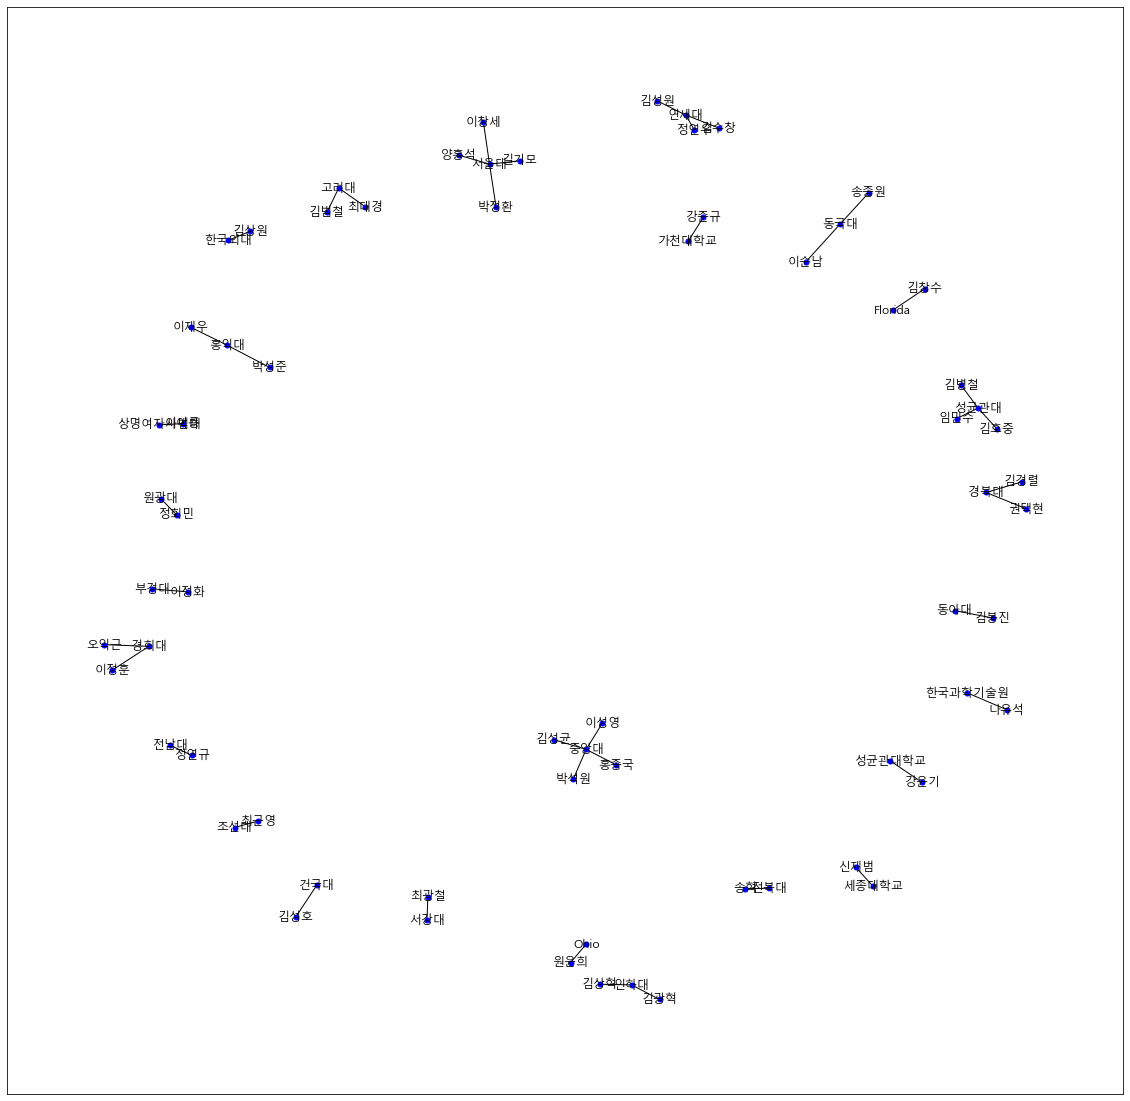

In [11]:
import matplotlib.font_manager as fm
import networkx as nx
# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

g = nx.Graph()
g = nx.from_pandas_edgelist(daishin_im, source = 'nm', target = 'main_career')
print(nx.info(g))

plt.figure(figsize=(20, 20))
pos = nx.spring_layout(g, k = 0.15)
nx.draw_networkx(g,pos, node_size = 25, node_color = 'blue', font_family='Malgun Gothic')
plt.show()

In [12]:
x=nx.betweenness_centrality(g)
sorted_nodes = sorted(x.items(), key=lambda x:x[1], reverse=True)
sorted_nodes[:]

[('서울대', 0.0027137042062415195),
 ('중앙대', 0.0027137042062415195),
 ('성균관대', 0.0013568521031207597),
 ('연세대', 0.0013568521031207597),
 ('홍익대', 0.0004522840343735866),
 ('경북대', 0.0004522840343735866),
 ('동국대', 0.0004522840343735866),
 ('경희대', 0.0004522840343735866),
 ('인하대', 0.0004522840343735866),
 ('고려대', 0.0004522840343735866),
 ('이어룡', 0.0),
 ('상명여자사범대', 0.0),
 ('송혁', 0.0),
 ('전북대', 0.0),
 ('길기모', 0.0),
 ('박성준', 0.0),
 ('이정화', 0.0),
 ('부경대', 0.0),
 ('권택현', 0.0),
 ('정연규', 0.0),
 ('전남대', 0.0),
 ('김호중', 0.0),
 ('정연우', 0.0),
 ('이재우', 0.0),
 ('이순남', 0.0),
 ('양홍석', 0.0),
 ('임민수', 0.0),
 ('김수창', 0.0),
 ('홍종국', 0.0),
 ('최근영', 0.0),
 ('조선대', 0.0),
 ('김상원', 0.0),
 ('한국외대', 0.0),
 ('나유석', 0.0),
 ('한국과학기술원', 0.0),
 ('신재범', 0.0),
 ('세종대학교', 0.0),
 ('강준규', 0.0),
 ('가천대학교', 0.0),
 ('강윤기', 0.0),
 ('성균관대학교', 0.0),
 ('김성원', 0.0),
 ('오익근', 0.0),
 ('박정환', 0.0),
 ('송종원', 0.0),
 ('김경렬', 0.0),
 ('김광혁', 0.0),
 ('박석원', 0.0),
 ('김성균', 0.0),
 ('최광철', 0.0),
 ('서강대', 0.0),
 ('최대경', 0.0),
 ('이정훈', 0.0),
 ('김봉진', 

Graph with 51 nodes and 42 edges


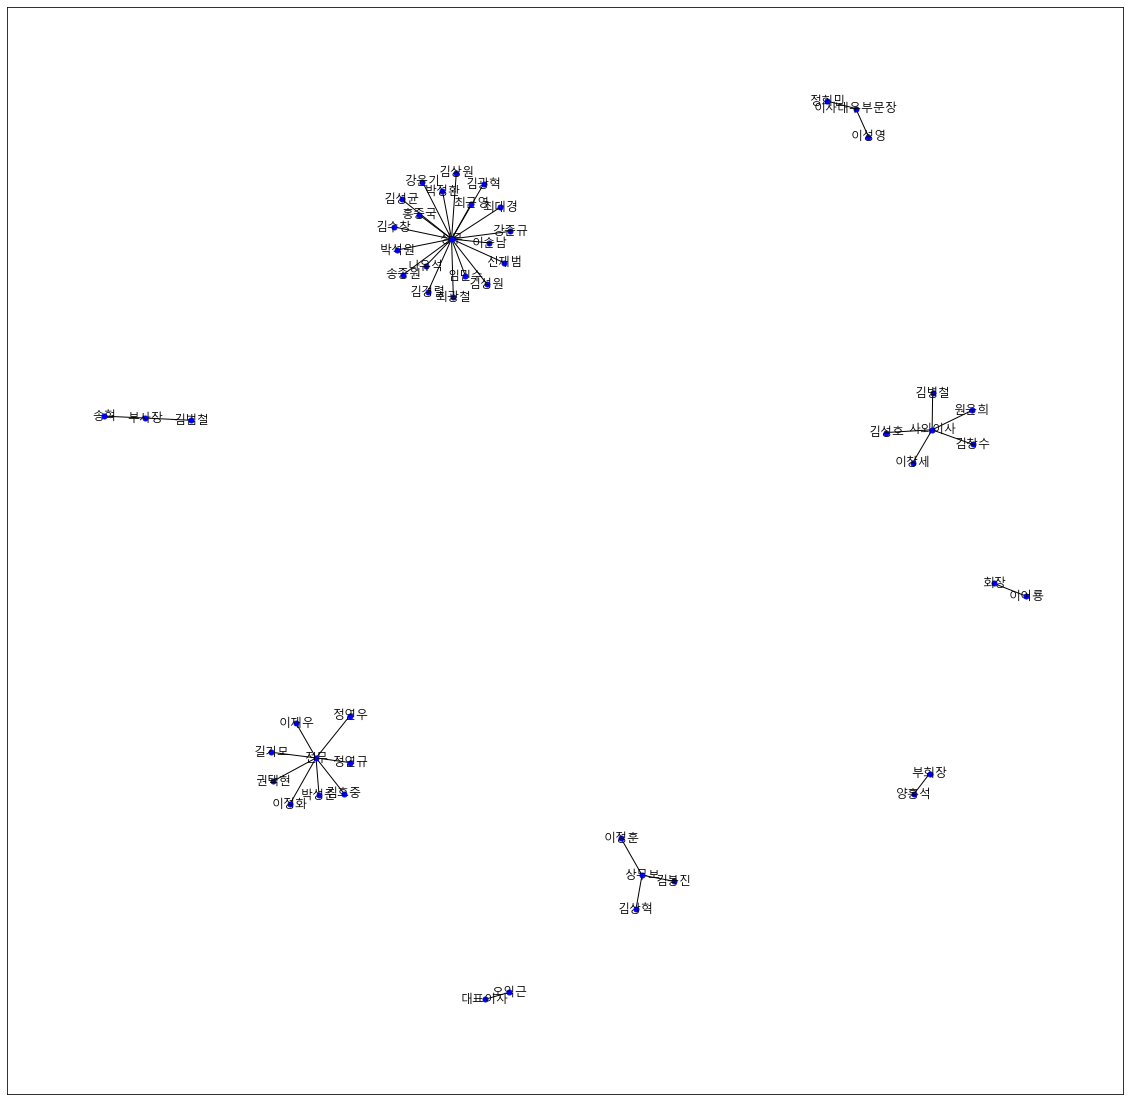

In [13]:
import matplotlib.font_manager as fm
import networkx as nx
# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

g = nx.Graph()
g = nx.from_pandas_edgelist(daishin_im, source = 'nm', target = 'ofcps')
print(nx.info(g))

plt.figure(figsize=(20, 20))
pos = nx.spring_layout(g, k = 0.15)
nx.draw_networkx(g,pos, node_size = 25, node_color = 'blue', font_family='Malgun Gothic')
plt.show()

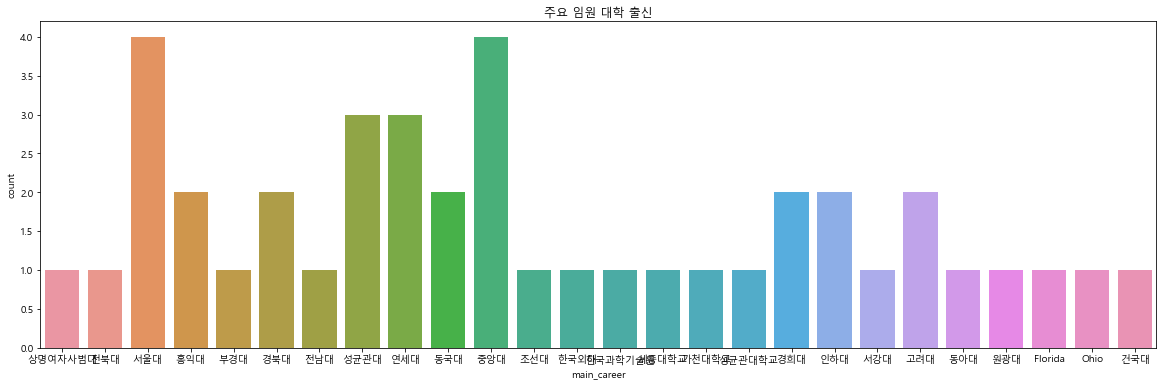

In [14]:
import seaborn as sns

plt.figure(figsize=(20, 6))

sns.countplot(x='main_career', data=daishin_im, orient='v')

plt.title('주요 임원 대학 출신')
plt.show()

In [15]:
x=nx.betweenness_centrality(g)
sorted_nodes = sorted(x.items(), key=lambda x:x[1], reverse=True)
sorted_nodes[:]

[('상무', 0.13959183673469389),
 ('전무', 0.022857142857142857),
 ('사외이사', 0.00816326530612245),
 ('상무보', 0.0024489795918367346),
 ('부사장', 0.0008163265306122449),
 ('이사대우부문장', 0.0008163265306122449),
 ('이어룡', 0.0),
 ('회장', 0.0),
 ('송혁', 0.0),
 ('길기모', 0.0),
 ('박성준', 0.0),
 ('이정화', 0.0),
 ('권택현', 0.0),
 ('정연규', 0.0),
 ('김호중', 0.0),
 ('정연우', 0.0),
 ('이재우', 0.0),
 ('이순남', 0.0),
 ('양홍석', 0.0),
 ('부회장', 0.0),
 ('임민수', 0.0),
 ('김수창', 0.0),
 ('홍종국', 0.0),
 ('최근영', 0.0),
 ('김상원', 0.0),
 ('나유석', 0.0),
 ('신재범', 0.0),
 ('강준규', 0.0),
 ('강윤기', 0.0),
 ('김성원', 0.0),
 ('오익근', 0.0),
 ('대표이사', 0.0),
 ('박정환', 0.0),
 ('송종원', 0.0),
 ('김경렬', 0.0),
 ('김광혁', 0.0),
 ('박석원', 0.0),
 ('김성균', 0.0),
 ('최광철', 0.0),
 ('최대경', 0.0),
 ('이정훈', 0.0),
 ('김봉진', 0.0),
 ('김병철', 0.0),
 ('김상혁', 0.0),
 ('이성영', 0.0),
 ('정회민', 0.0),
 ('이창세', 0.0),
 ('김창수', 0.0),
 ('원윤희', 0.0),
 ('김성호', 0.0),
 ('김범철', 0.0)]

In [17]:
daishin.head(3)


,rcept_no,corp_cls,corp_code,corp_name,stock_knd,nm,relate,bsis_posesn_stock_co,bsis_posesn_stock_qota_rt,trmend_posesn_stock_co,trmend_posesn_stock_qota_rt,rm
0,20230316001545,Y,00110893,대신증권,보통주,양홍석,본인,"4,985,667",9.82,"5,175,034",10.19,*시장매입\n*자사주성과급
1,20230316001545,Y,00110893,대신증권,우선주,양회금,특수관계인,"2,245",0.01,"2,245",0.01,-
2,20230316001545,Y,00110893,대신증권,보통주,노정남,특수관계인,"40,737",0.08,"40,737",0.08,-


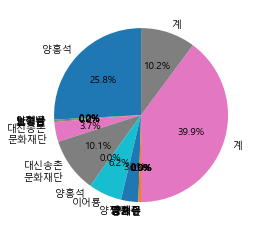

In [21]:
plt.pie(daishin['bsis_posesn_stock_qota_rt'], labels=daishin['nm'], startangle=90)
plt.show()
